# Context
I've implemented two ways to estimate heart rate
1. Use Welch’s PSD estimate
   - Find largest PSD peak within heart rate range
   - “Valid” if Largest peak within heart rate range > 1.5x peaks outside heart rate range
   - Allows for 2nd harmonic peak
   - Return NaN if no valid peak found
2. Use peak counting
   - Standardize the signal
   - Return all peaks with peak prominence threshold of 0.5
   - Time difference between peaks are the instantaneous HR.
   - Take median or average to aggregate
   - A good alternative to estimate heart rate if PSD spectra is messy.

The algorithm uses method 2 only if method 1 returns NaN.

This notebook compares the methods implemented against the Philips patient monitor estimate.

The implemented algorithm seems to have good agreement with the reference data.


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [12]:
df = pd.read_csv('../data/results/capnobase_peak count update - dynamic window size20240108 150948_features.csv')

/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


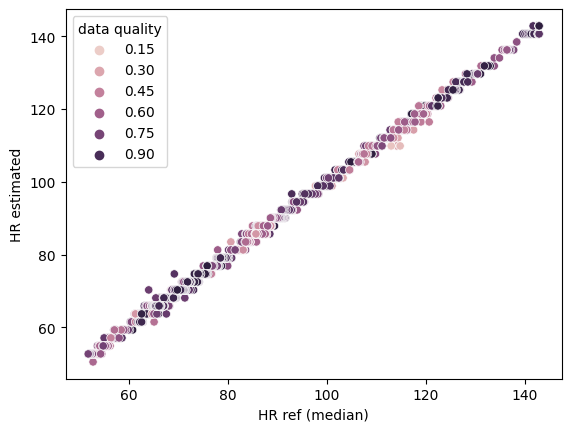

In [13]:
include = df['quality - template matching-pct diagnostic quality pulses']> 0.1
sns.scatterplot(
    x = df['HR ref (median)'][include],
    y = df['HR estimated'][include],
    hue = df['quality - template matching-pct diagnostic quality pulses'][include]
)
plt.legend(title = 'data quality')
plt.show()


/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


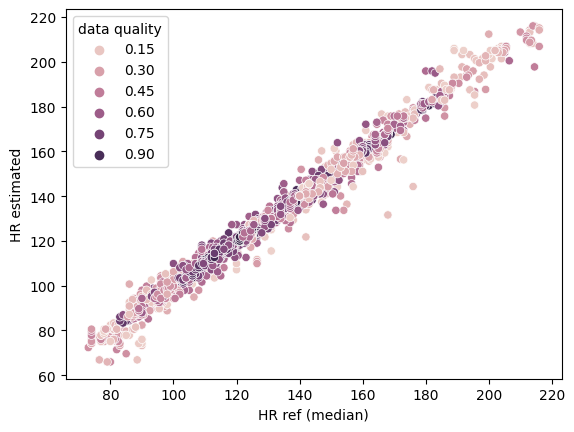

In [14]:
# kapiolani data
df = pd.read_csv('../data/results/kapiolani_peak count update - dynamic window size20231219 224729_features.csv')
include = df['quality - template matching-pct diagnostic quality pulses']> 0.1
sns.scatterplot(
    x = df['HR ref (median)'][include],
    y = df['HR estimated'],
    hue = df['quality - template matching-pct diagnostic quality pulses'][include]
)
plt.legend(title = 'data quality')
plt.show()


/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kfchou/miniconda3/envs/rrest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


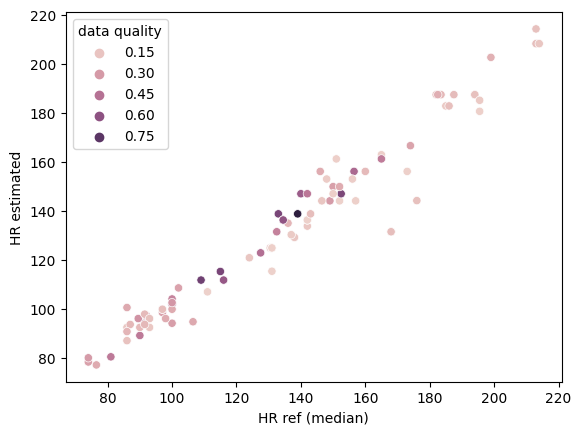

In [15]:
# Which trials did the avg HR estimate fail?
include = (
    (df['quality - template matching-pct diagnostic quality pulses']> 0.1) 
    & (df['HR est reliable']==False))

sns.scatterplot(
    x = df['HR ref (median)'][include],
    y = df['HR estimated'][include],
    hue = df['quality - template matching-pct diagnostic quality pulses'][include]
)
plt.legend(title = 'data quality')
plt.show()